In [ ]:
__Diminos Store - Delivery Time__

__Dataset Link : __ diminos_data.csv

__Problem Statement 🍕__
Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. 
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business. 

__TASK__
Assume that you are a freelance data scientist. 

Help Kanav by analyzing the data and sharing insights to keep his business up and running.








## 1️)Import Required Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load Dataset

In [2]:
# Load data
df = pd.read_csv(r"C:\Users\HP\Downloads\diminos_data.csv")

In [3]:
# Quick look
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


Loaded Dominos order dataset for delivery performance analysis.

## 3)Dataset Overview

In [4]:
df.shape

(15000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
df.describe(include = "all")

,order_id,order_placed_at,order_delivered_at
count,1.500000e+04,15000,15000
unique,NaN,14953,15000
top,NaN,2023-03-10 07:39:41,2023-03-28 00:13:42.499311
freq,NaN,2,1
mean,1.530610e+06,NaN,NaN
std,4.330271e+03,NaN,NaN
min,1.523111e+06,NaN,NaN
25%,1.526861e+06,NaN,NaN
50%,1.530610e+06,NaN,NaN
75%,1.534360e+06,NaN,NaN


This step helps understand data size, column types, missing values, and basic statistics.

## 4)Convert Date-Time Columns

In [7]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

## 5)Feature Engineering – Delivery Time (Minutes)

In [8]:
df['delivery_time_minutes'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds() / 60

In [9]:
df[['delivery_time_minutes']].head()

,delivery_time_minutes
0,17.140719
1,15.598754
2,15.104856
3,38.533657
4,16.176984


Created a new feature representing actual delivery time in minutes — the key SLA metric.

## 6)Data Cleaning

In [10]:
# Remove negative or zero delivery times
df = df[df['delivery_time_minutes'] > 0]

# Remove missing values
df = df.dropna(subset=['delivery_time_minutes'])

Cleaned invalid and missing delivery records to ensure accurate analysis.

## 7)Delivery Time Distribution

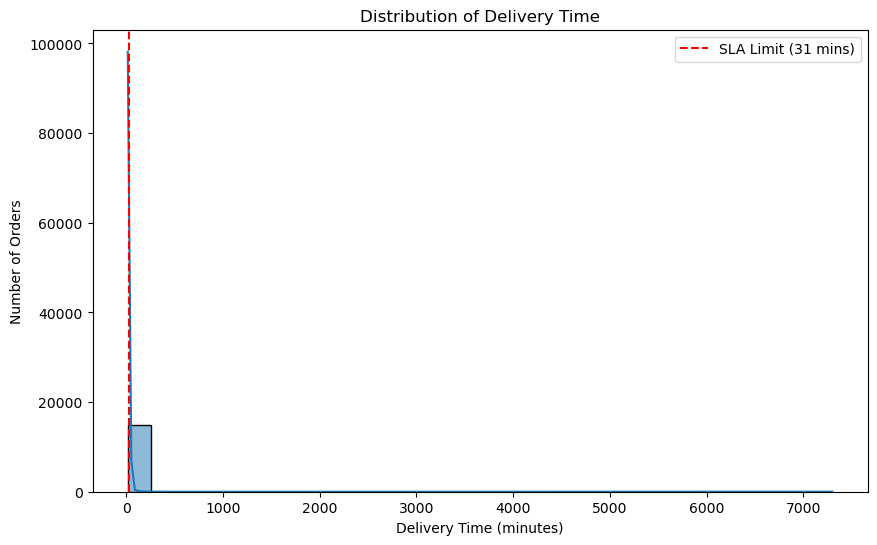

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['delivery_time_minutes'], bins=30, kde=True)
plt.axvline(31, color='red', linestyle='--', label='SLA Limit (31 mins)')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Time")
plt.legend()
plt.show()

__Insight:__

Most deliveries fall under the 31-minute SLA, but a visible tail indicates delayed orders that risk SLA violation.

## 8) 95th Percentile SLA Check

In [12]:
p95 = np.percentile(df['delivery_time_minutes'], 95)
p95

np.float64(27.261043996666658)

In [13]:
if p95 <= 31:
    print(" SLA MET: 95th percentile is within 31 minutes")
else:
    print(" SLA VIOLATED: 95th percentile exceeds 31 minutes")

 SLA MET: 95th percentile is within 31 minutes


__Insight:__

The 95th percentile delivery time determines franchise compliance with Diminos’ SLA policy.

## 9)Average & Median Delivery Time

In [14]:
df['delivery_time_minutes'].agg(['mean', 'median', 'max'])

mean        20.499389
median      15.797986
max       7299.831375
Name: delivery_time_minutes, dtype: float64

__Insight:__

Mean and median help compare normal vs delayed delivery behavior.

## 10)Peak Hour Analysis

In [15]:
df['order_hour'] = df['order_placed_at'].dt.hour

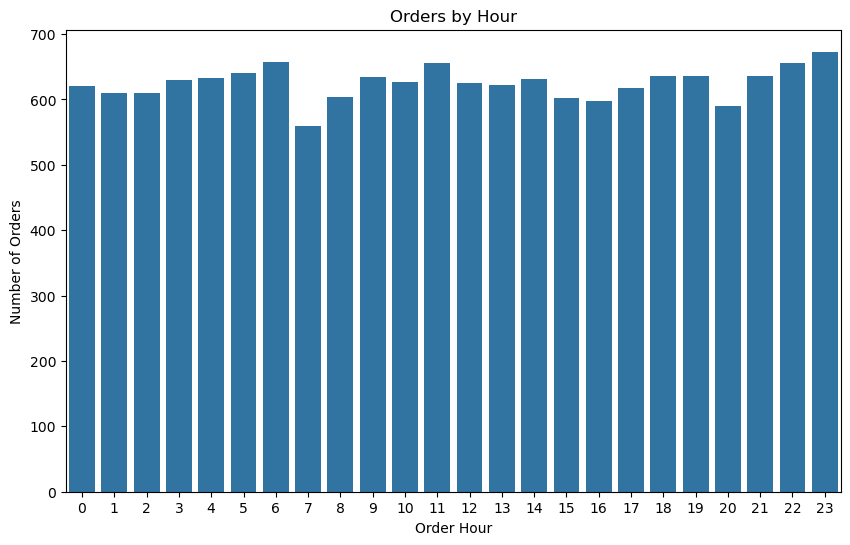

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_hour', data=df )
plt.xlabel("Order Hour")
plt.ylabel("Number of Orders")
plt.title("Orders by Hour")
plt.show()

__Insight:__

Order volume peaks during lunch and dinner hours, increasing delivery delays

## 11 )Delivery Time by Hour

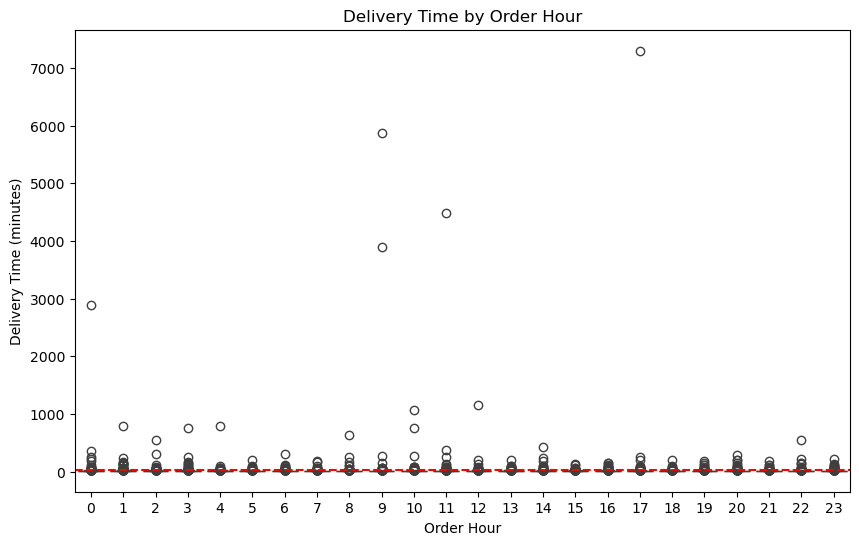

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='order_hour', y='delivery_time_minutes', data=df)
plt.axhline(31, color='red', linestyle='--')
plt.xlabel("Order Hour")
plt.ylabel("Delivery Time (minutes)")
plt.title("Delivery Time by Order Hour")
plt.show()

__Insight:__

Late-night and peak-hour orders show higher delivery time variability.

## 12)Percentage of Late Deliveries

In [18]:
late_orders = (df['delivery_time_minutes'] > 31).mean() * 100
late_orders

np.float64(3.713333333333333)

__Insight:__

This metric directly reflects revenue loss risk due to free pizza policy.